<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi Linear Regression: 
Regression is a supervised learning algorithm which takes a set of real input values and to make prediction on the set of new real values. basically they are mapping input to the output.
the simplest form  of linear regression models are also linear funcion of input variables.
we have the fucnitons which are linear funcion of parameters and non linear with respect to the inputs(X), these are known as **basis functions**


In this experiment we consider more than one independent parameters to estimate the dependent variable(Co2 Emissions).

# Getting the data and Importing the required libraries

In [61]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data Exploration

In [63]:
# Read the dataset
df = pd.read_csv(path)
# getting overall idea about our dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [64]:
# lets get more insight about the data by using describe() method
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### by using **info()** method, we will get more insihgt about our data, how many rows,columns,their respective datatype, if there is any null rows and so on

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Now we will look for some specific features, which we among them we will choose for our Multiple linear regression.

In [77]:
sdf = df[["CYLINDERS","FUELCONSUMPTION_COMB_MPG","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY","ENGINESIZE","CO2EMISSIONS","ENGINESIZE"]]
sdf.head(10)
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CYLINDERS                 1067 non-null   int64  
 1   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 2   FUELCONSUMPTION_COMB      1067 non-null   float64
 3   FUELCONSUMPTION_HWY       1067 non-null   float64
 4   ENGINESIZE                1067 non-null   float64
 5   CO2EMISSIONS              1067 non-null   int64  
 6   ENGINESIZE                1067 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 58.5 KB


#### For example by observing above table we can see that as engine size and number of cylinders increases, the Co2Emission also increases, same relation with respect to other independent features.
Lets do a scatter plot vs Co2Emissions

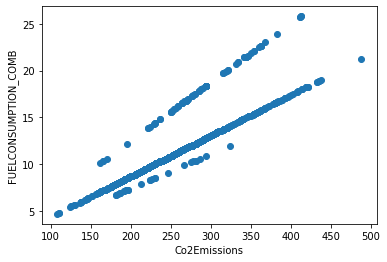

In [67]:
plt.scatter(df["CO2EMISSIONS"],df["FUELCONSUMPTION_COMB"],alpha = 1)
plt.xlabel("Co2Emissions")
plt.ylabel("FUELCONSUMPTION_COMB")
plt.show()

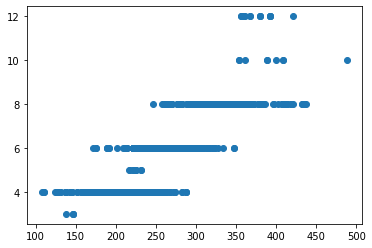

In [68]:
plt.scatter(sdf.CO2EMISSIONS,sdf.CYLINDERS)

Text(0, 0.5, 'Co2Emissions')

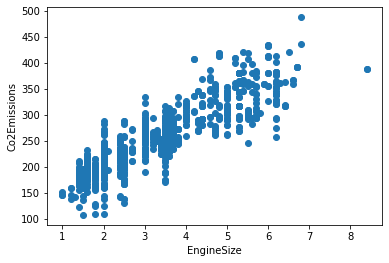

In [71]:
plt.scatter(df["ENGINESIZE"],df["CO2EMISSIONS"])
plt.xlabel("EngineSize")
plt.ylabel("Co2Emissions")

### Creating the train and test datasets
training and testing datasets should be from same datasets, but not mixed, they should be mutually exclusive, the data which we are going to feed to our model should not be same as the test data. with test data we are going to check our model how will it does, that is what we are interesting more, Generalization.
predicting well on unseen dataset.
we use masking,means will mask the test data to be untouched during the training.

In [74]:
mask = np.random.rand(len(df))<0.8
train = sdf[mask]
test = sdf[~mask]

## Multiple Linear Regression
Here , we consider effects of more than one independent feature for our model to check their effects on CO2EMISSION.
We will take these features
* CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_HWY, ENGINESIZE, CO2EMISSIONS.
 
Sklearn comes with linear model library, we will take advantage of that

In [89]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
x = np.asanyarray(train[["CYLINDERS","FUELCONSUMPTION_COMB_MPG","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY","ENGINESIZE"]])
y = np.asanyarray(train["CO2EMISSIONS"])
# fit the model
regression.fit(x,y)
print("coefficients",regression.coef_) 

coefficients [ 8.07067757 -3.87177137 -2.03054274  5.29682725  4.36251576  4.36251576]


## Checking the model performance
by performance we means that, we will see the difference between our model prediction and the true labels. 
basically we have different ways to check how well our model is doing, here we will go for the simplest one which calculate the difference between our prediction and the true label, then square them. **Ordinary Least Squares**

In [115]:
y_pred = regression.predict(test[["CYLINDERS","FUELCONSUMPTION_COMB_MPG","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY","ENGINESIZE"]])
x = np.asanyarray(test[["CYLINDERS","FUELCONSUMPTION_COMB_MPG","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY","ENGINESIZE"]])
y = np.asanyarray(test["CO2EMISSIONS"])
error = np.mean((y_pred-y)** 2)
print("Residual sum of squares",error)

Residual sum of squares 345.4069843617147


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### **Covarinance** provides a measure of much variability is there around mean value of our estimated function. 

In [116]:

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regression.score(x, y))

Variance score: 0.92


### Conclusion
We implemented a simple linear regression model by using the data from IBM, to see the effects of multiple features of a car on Co2 Emission.